<a href="https://colab.research.google.com/github/sachinkun21/Titanic_kaggle/blob/master/Tutorial_Titanic_Disaster_Prediction_Kaggle_ver3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Introduction

In this kernel I will go through the whole process of creating a machine learning model on the famous Titanic dataset, which is used by many people all over the world. It provides information on the fate of passengers on the Titanic, summarized according to economic status (class), sex, age and survival. In this challenge, I will predict whether a passenger on the titanic would have been survived or not.

### About Titanic 

RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

### About the Data Set

We have data of all passengers and the problem statement is to predict the survival  of a passenger given his current data inputs. The complete data can be downloaded here - www.kaggle.com/c/titanic


### Titanic - The sad story
- Exploratory Data Analysis I
- Exploratory Data Analysis II
- EDA - Visualization/Plotting
- Preprocessing
- Preprocessing II
- Feature Engineering
- Modelling
- Advanced Modelling
- Final Model
- Model Evaluation
- Feature Importance
- Feedback



In [0]:
# Mounting drive to load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading Data and Diagnostics
Let's import all required packages Modules

In [0]:
# linear algebra
import numpy as np
# data processing
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algortithmic packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import os
import warnings
warnings.filterwarnings('ignore')

#### Let's Load the dataset in a pandas Dataframe

In [0]:
print(os.listdir("/content/drive/My Drive/titanic"))

['test.csv', 'train.csv', 'gender_submission.csv']


In [0]:
# loading Datasets
train_df = pd.read_csv('/content/drive/My Drive/titanic/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/titanic/test.csv')

#printing first 5 rows of data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
# let's display the columns names
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# printing shape of Train Dataframe
train_df.shape

(891, 12)

#### Description of Columns in Dataset
The training set has 891 examples and 11 features along with the Target variable(survived). Datatypes for 2 of the features are floats, 5 are integers and 5 are objects. Below I have listed the features with a short description:

      survival:   Survival
      PassengerId: Unique Id of a passenger.
      pclass:     Ticket class   
      sex   :     Sex 
      Age   :     Age in years    
      sibsp :     # of siblings / spouses aboard the Titanic  
      parch :     # of Childs / children aboard the Titanic  
      ticket:     Ticket number   
      fare  :     Passenger fare  
      cabin :     Cabin number    
      embarked:   Port of Embarkation

#### Let's check info of the dataset to get an idea of it's datatype and how it's looking

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### There are some missing values in Age and Cabin Column in Train Data while Age, Cabin and Fare in test data.
 we will be dealing with these missing values in coming sections

#### Let's take a look at description of columns having numerical Values in Dataset

In [0]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- from the output of describe Above, we can see that 38% out of the training-set survived the Titanic. 
- We can also see that the passenger ages range from 0.4 to 80. 
- On top of that we can already detect some features, that contain missing values, like the 'Age' feature. 
- Also we can find outliers if any by visual observation of quartiles.

Let's look at head of the data

In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### From the table above, we can note following things:
- First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.
- Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale.
- We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

Let's take a more detailed look at what data is actually missing:

In [0]:
# count of null values in each column
count  = train_df.isnull().sum().sort_values(ascending = False)

# percentage of Null Values in each column
percent = train_df.isnull().sum()/len(train_df)*100

# rounding and arranging the percentage
percent = round(percent,2).sort_values(ascending = False)

# concatenating count and percentage into one
missing_data = pd.concat([count,percent], axis = 1)
missing_data.columns = ['Count', 'Percent']
# printing top 5 rows
missing_data.head()

,Count,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


- You can notice, Cabin has the highest percentage of missing values.
- The Embarked feature has only 2 missing values, which can easily be filled. 
- It will be much more tricky, to deal with the 'Age' feature, which has 177 missing values. 
-The 'Cabin' feature needs further investigation, but it looks like that we might need to drop it from the dataset, since 77 % of it are missing.



### Visualization
In this section, we will derive relationships and insight from our Training Dataset by plotting them.
<br>
<br>



#### 1. Let's plot a couple of graphs to qunatify the survival percentage and Survival Percentage in Each PClass for each Gender

#### Let's plot the bargraph to indicate chances of survival in Each PClass first: 

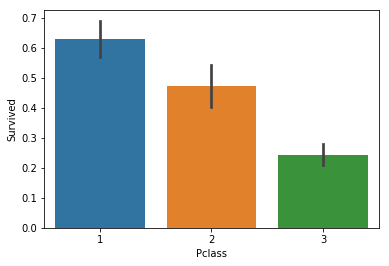

In [0]:
sns.barplot(x = 'Pclass', y = 'Survived' , data = train_df)
plt.show()

we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

Let's go Deeper into it


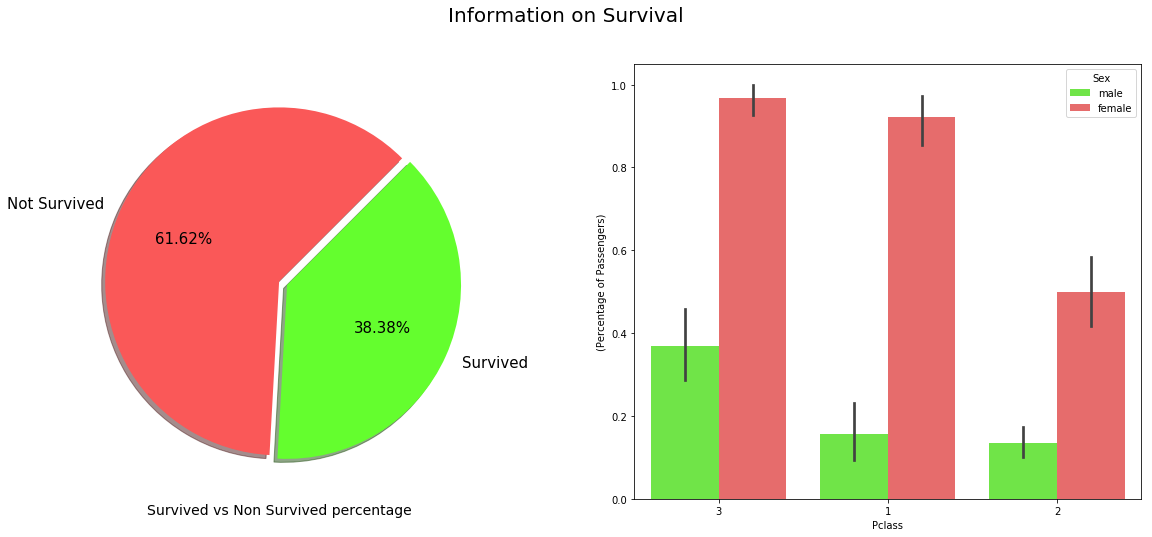

In [0]:
f, ax = plt.subplots(1,2, figsize=(20,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Not Survived", "Survived"

plt.suptitle('Information on Survival', fontsize=20)

train_df["Survived"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=15, startangle=45)



ax[0].set_xlabel('Survived vs Non Survived percentage', fontsize=14)
ax[0].set_ylabel('')

palette = ["#64FE2E", "#FA5858"]

sns.barplot(x = 'Pclass', y = 'Survived' , hue = 'Sex' , data = train_df, palette=palette)
ax[1].set(ylabel="(Percentage of Passengers)")
ax[1].set_xticklabels(train_df["Pclass"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

we can derive:-
- 61.62% Passengers did not survived while 38.38% survived the Titanic Disaster
- Females had a higher survival percentage in each class compared to male counterparts
- PClass 3 has highest percentage of People surviving both in Male and Female category, followed by PClass 1 and PClass 2

In [0]:
train_df[(train_df.Pclass == 3) & (train_df.Survived == 1)].Sex.value_counts()/len(train_df[(train_df.Pclass == 3) & (train_df.Survived == 1)].Sex)*100

female    60.504202
male      39.495798
Name: Sex, dtype: float64

#### 2. Age vs Sex
To check the relationship between survival vs age/sex, let's plot the distribution of data.

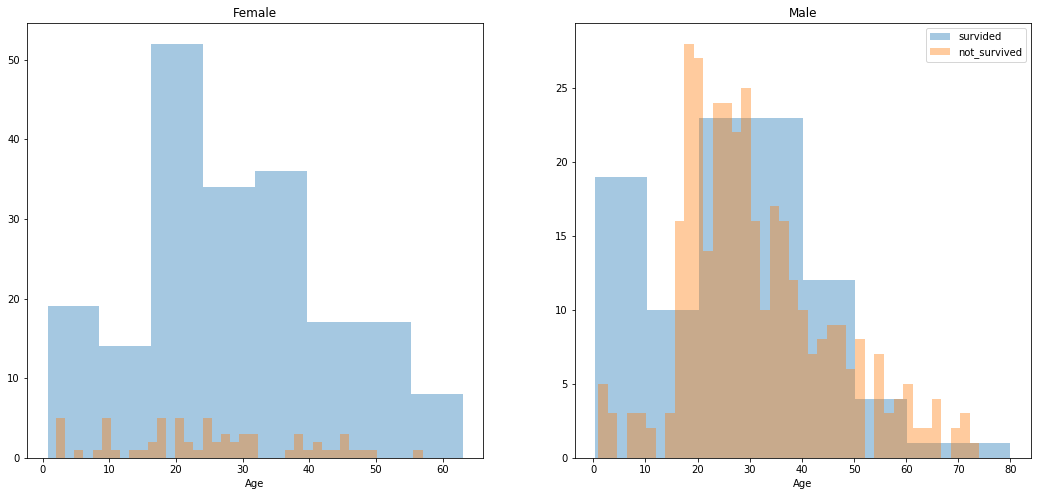

In [0]:
survived = 'survided'
not_survived = 'not_survived'
fig, axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (18,8))
women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=8, label = survived , ax=axes[0], kde = False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label=not_survived, ax = axes[0], kde =False)
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=8, label = survived , ax=axes[1], kde = False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins = 40, label=not_survived, ax = axes[1], kde =False)
_ = ax.set_title('Male')
ax.legend()
plt.show()

- You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. For women the survival chances are higher between 14 and 40.

- For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to note is that infants also have a little bit higher probability of survival.

- Since there seem to be certain ages, which have increased odds of survival and because I want every feature to be roughly on the same scale, We will create age groups later on.

#### 3. Embarked, Pclass and Sex:

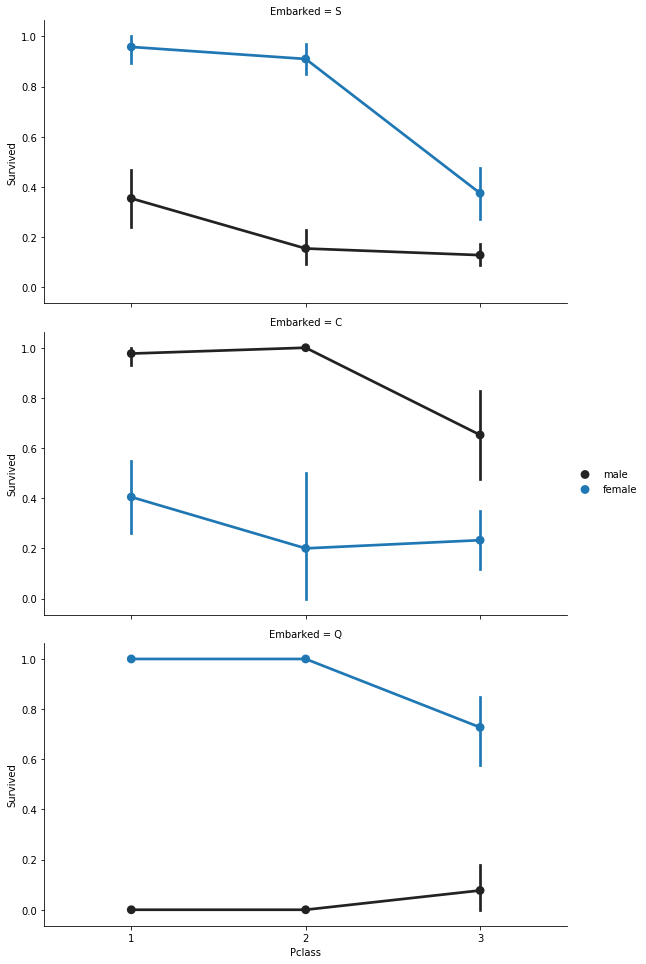

In [0]:
facetgrid = sns.FacetGrid(train_df , row = 'Embarked', height = 4.5 , aspect =1.8)
facetgrid.map(sns.pointplot, 'Pclass','Survived', 'Sex', order=None, hue_order=None)
facetgrid.add_legend()
plt.show()

- Females who embarked from `port S` have a higher percentage of Survival Compared to Male Counterparts from Same port in each P Class
- Males who embarked from `port C` have a higher percentage of Survival Compared to FeMale Counterparts from Same port in each P Class
- Females who embarked from `port O` have a higher percentage of Survival Compared to Male Counterparts from Same port in each P Class

#### 3. Let's create another plot below for distribution of P Class:


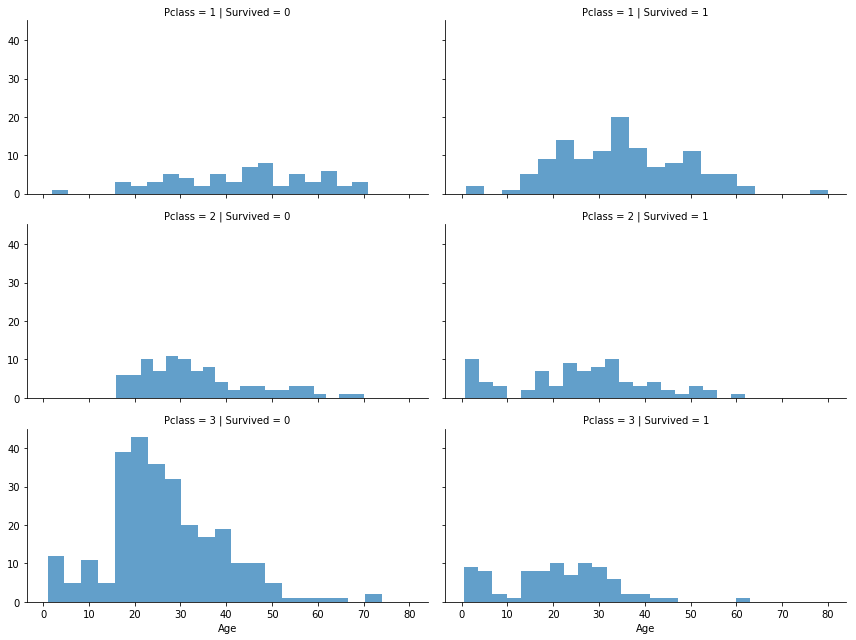

In [0]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col='Survived', hue_order=None, height = 3, aspect=2)
grid.map(plt.hist, 'Age', alpha=0.7, bins = 20)
plt.show()


You can see the Distribution of survived passenger from different age Groups in Each Class

#### 4. Assuming, Being alone and survival rate has high dependency. let's Create a new binary feature - 'Alone' 

In [0]:
data = [train_df , test_df]
for dataset in data:
  dataset['Relatives']=dataset['Parch']+dataset['SibSp']
  dataset.loc[dataset['Relatives']>0,'Alone']=0
  dataset.loc[dataset['Relatives']==0,'Alone']=1
  dataset['Alone']=dataset['Alone'].astype(int)

In [0]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [0]:
train_df.Alone.value_counts()

1    537
0    354
Name: Alone, dtype: int64

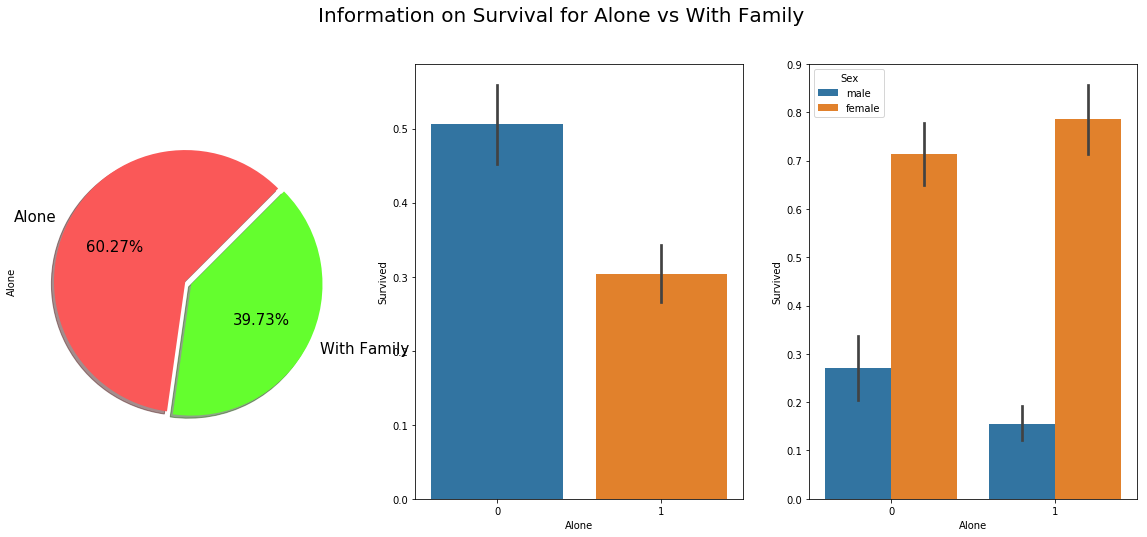

In [0]:
f, ax = plt.subplots(1,3, figsize=(20,8 ))
plt.suptitle('Information on Survival for Alone vs With Family', fontsize=20)

train_df["Alone"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=['Alone', 'With Family'], fontsize=15, startangle=45)
sns.barplot(x = 'Alone', y = 'Survived',data = train_df , ax = ax[1])
sns.barplot(x = 'Alone', y = 'Survived', hue = 'Sex',data = train_df,  ax = ax[2])
plt.show()

- 60.27% of Passengers are alone while 39.73% passengers are with Family
- As we can see people who were alone had a lower rate of survival in both Females as well as Males.
- Females who were alone had a slightly higher chance of survival compared to Females with Family.

#### 5. No_of_Relatives vs Survived

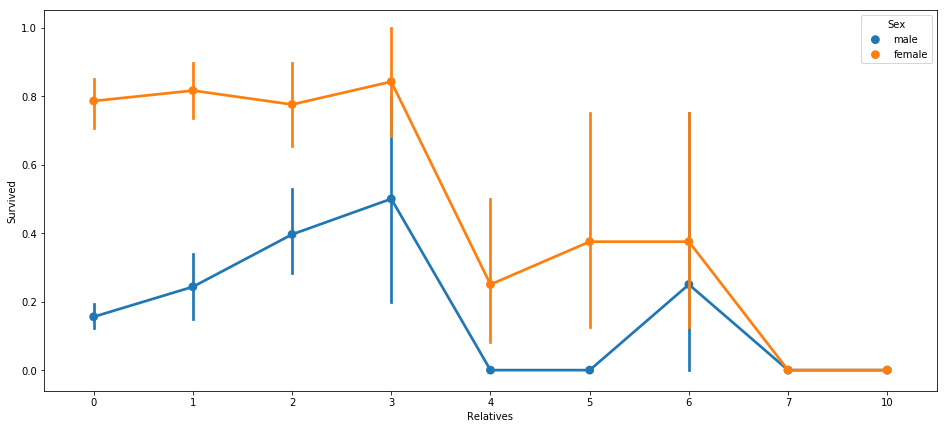

In [0]:
plt.figure(figsize=(16,7))
sns.pointplot(x='Relatives', y = 'Survived',hue = 'Sex', data= train_df )
plt.show()

Very interesting to note that survival rate slowly increases and then falls down with Increase in number of Relatives

### Basic Pre-Processing

In first step,we will see if any features are irrelevant and drop them. 
As you can see passenger ID is irrelevant.  I will drop 'PassengerId' from the train set, because it does not contribute to a persons survival probability. 

I will not drop it from the test set, since it is required there for the submission

In [0]:
train_df = train_df.drop(['PassengerId'], axis = 1)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Relatives,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


### Missing Value Treatment

#### Missing Data in cabin :
 As a reminder, we have to deal with Cabin (687), Embarked (2) and Age (177). First I thought of dropping the 'Cabin' variable but then I found something interesting.

`A cabin number looks like ‘C123’ where the first letter refers to the deck.`
 
- Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable. 

- The missing values will be replaced with to 'U0'. In the picture below you can see the actual decks of the titanic, ranging from A to G.

- For Passengers with missing Data in Cabin, we will put them in Deck U representing Unknown Deck

In [0]:
import re

deck =  {'A':1  , 'B': 2 , 'C': 3, 'D':4 ,'E' : 5 , 'F':6 , 'G':7 , 'U':8}
data = [train_df , test_df]
for dataset in data:
  dataset['Cabin']=dataset['Cabin'].fillna('U0')
  dataset['Deck']=dataset['Cabin'].map(lambda x : re.compile("([a-zA-Z]+)").search(x).group())
  dataset['Deck']=dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck']=dataset['Deck'].astype(int)

In [0]:
train_df.Deck.value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

In [0]:
# Same code as above, Regular Expression Simplified

import re

deck =  {'A':1  , 'B': 2 , 'C': 3, 'D':4 ,'E' : 5 , 'F':6 , 'G':7 , 'U':8}
data = [train_df , test_df]

for dataset in data:
  dataset['Cabin']=dataset['Cabin'].fillna('U0')
  dataset['Deck']=dataset['Cabin'].map(lambda x : x[0])
  dataset['Deck']=dataset['Deck'].map(deck)
  dataset['Deck']=dataset['Deck'].fillna(0)
  dataset['Deck']=dataset['Deck'].astype(int)

  
  
train_df.Deck.value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

we can now drop the cabin feature now

In [0]:
data = [train_df,test_df]
for dataset in data:
  dataset=dataset.drop(['Cabin'], axis = 1)

In [0]:
train_df=train_df.drop('Cabin', axis = 1)
test_df=test_df.drop('Cabin', axis = 1)

#### Missing data in Age
Now we can tackle the issue with the age features missing values:  

I will create an array of size n that contains random numbers, which are computed based on the mean age value in regards to the standard deviation where n is equal to number of missing Values.

In [0]:
data = [train_df , test_df]
mean = train_df['Age'].mean()
std  = test_df['Age'].std()


for dataset in data:
  count_of_null = dataset['Age'].isnull().sum()
  
  rand_age = np.random.randint(mean-std,mean+std, size = count_of_null)
  
  age_slice = dataset['Age'].copy()
  age_slice[np.isnan(age_slice)]= rand_age
  
  dataset['Age']=age_slice
  dataset['Age']=dataset['Age'].astype(int)

#### Missing data in Embarked:
Since the Embarked feature has only 2 missing values, we will just fill these with the most common one.



In [0]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [0]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')

#### All the missing values in our TrainDF and Test_DF dataset has been dealt.
#### Let's check info of on both the Dataframes to verify this


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
Relatives    891 non-null int64
Alone        891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
Relatives      418 non-null int64
Alone          418 non-null int64
Deck           418 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 42.5+ KB


#### Uh oh! 1 value is missing in Fare Column in test data set. Let's deal with it before moving forward

In [0]:
test_df.Fare = test_df.Fare.fillna(mean)
test_df.Fare.isna().sum()

0

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
Relatives      418 non-null int64
Alone          418 non-null int64
Deck           418 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 42.5+ KB


So No Null values anymore. Let's Move ahead

### Feature Engineering 

#### Using Name to Extract useful Information
 We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [0]:
train_df.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [0]:
data = [train_df,test_df]

for dataset in data:
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)

In [0]:
train_df.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Capt          1
Ms            1
Lady          1
Mme           1
Don           1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [0]:
data = [train_df,test_df]

for dataset in data:
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr',\
                                              'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle' , 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms' , 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme' , 'Mrs')
  

In [0]:
titles={'Mr':1,'Miss':2,'Mrs':3, 'Master':4, 'Rare':5}

for dataset in data:
  dataset['Title']=dataset['Title'].map(titles)

In [0]:
print(train_df.Title.isna().sum())
print(test_df.Title.isna().sum())

0
0


Dropping name Column now as we have already extracted useful information from it and full name is of no use to us anymore

In [0]:
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

#### Sex is categorical but we have to convert 'Sex' feature into numeric.

In [0]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
gender = {'male':0 , 'female':1}
data = [train_df,test_df]

for dataset in data:
  dataset['Sex']=dataset['Sex'].map(gender)

#### Ticket & Fare

In [0]:
train_df.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful information. So we will drop it from the dataset.

In [0]:
train_df=train_df.drop('Ticket', axis = 1)
test_df=test_df.drop('Ticket', axis = 1)

#### Embarked
Let's convert Embark into a numerical Feature

In [0]:
ports = {'S':0,'C':1, 'Q':2}
data = [train_df,test_df]

for dataset in data:
  dataset['Embarked']=dataset['Embarked'].map(ports)

#### More Features


We will now create categories within the following features:

#### Age Category Binning:
Now we will create bins fro the 'age' feature. First we will convert it from float into integer. Then we will create the new 'AgeGroup" variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don't want for example that 80% of your data falls into group 1.

In [0]:
data = [train_df,test_df]
for dataset in data:
  dataset['Age']=dataset['Age'].astype(int)
  dataset.loc[dataset['Age']<=11, 'Age']=0
  dataset.loc[(dataset['Age']>11) & (dataset['Age']<=18), 'Age']=1
  dataset.loc[(dataset['Age']>18) & (dataset['Age']<=22), 'Age']=2
  dataset.loc[(dataset['Age']>22) & (dataset['Age']<=27), 'Age']=3
  dataset.loc[(dataset['Age']>27) & (dataset['Age']<=33), 'Age']=4
  dataset.loc[(dataset['Age']>33) & (dataset['Age']<=40), 'Age']=5
  dataset.loc[(dataset['Age']>40) & (dataset['Age']<=66), 'Age']=6
  dataset.loc[(dataset['Age']>66), 'Age']=6

The above grouping can also be achieved in single line with Pd.Cut. You can give a try.

Now Let's see the Groups.

In [0]:
train_df.Age.value_counts()

6    165
4    158
5    150
3    142
2    114
1     94
0     68
Name: Age, dtype: int64

#### Fare binning
Similarly for the fare , we do same approach, For the 'Fare' feature, we need to do the same as with the 'Age' feature. But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn "qcut()" function, that we can use to see, how we can form the categories.

Current dataframe looks as follows


In [0]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Deck,Title
0,0,3,0,2,1,0,7.2500,0,1,0,8,1
1,1,1,1,5,1,0,71.2833,1,1,0,3,3
2,1,3,1,3,0,0,7.9250,0,0,1,8,2
3,1,1,1,5,1,0,53.1000,0,1,0,3,3
4,0,3,0,5,0,0,8.0500,0,0,1,8,1


#### Let's Perform Fare binning Now:


In [0]:
data = [train_df,test_df]

for dataset in data:
  dataset.loc[dataset['Fare']<=7.91, 'Fare']=0
  dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
  dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), 'Fare']=2
  dataset.loc[(dataset['Fare']>31) & (dataset['Fare']<=99), 'Fare']=3
  dataset.loc[(dataset['Fare']>99) & (dataset['Fare']<=250), 'Fare']=4
  dataset.loc[(dataset['Fare']>250) , 'Fare']=5
  dataset['Fare']=dataset['Fare'].fillna(0)
  dataset['Fare']=dataset['Fare'].astype(int)

train_df.Fare.value_counts()

2    229
0    223
1    217
3    169
4     44
5      9
Name: Fare, dtype: int64

In [0]:
# test_df[test_df.Fare.isna()==True]

#### Let's Create a new Feature A combination of Age and Class

In [0]:
data = [train_df, test_df]


for dataset in data:
  dataset['age_class'] = dataset['Age']*dataset['Pclass']
  
  
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Deck,Title,age_class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,1,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15


In [0]:
# Let's see the top 5 row of processed dataset
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Relatives,Alone,Deck,Title,age_class
0,0,3,0,2,1,0,0,0,1,0,8,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,1,0,0,1,8,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,8,1,15


#### So, both the dataframes have been processed and ready to be Modeled.

let's go to the most exciting part of this: Modeling

## Modeling

#### Let's divide our data into Feature or Preictor Variables i.e X and Label or Predicted variable i.e y

In [0]:
X_train = train_df.drop('Survived', axis = 1)
y_train = train_df['Survived']

X_test = test_df.drop('PassengerId' ,  axis = 1)

#### Now let's train our first Model: A Stochastic Gradient Descent Classifier

In [0]:
# creating model object
sgd = linear_model.SGDClassifier(max_iter = 5, tol = None)

# Fitting model on Data
sgd.fit(X_train,y_train)

#using model to predict
y_pred = sgd.predict(X_test)

# Storing prediction accuracy
acc_sgd = round(sgd.score(X_train,y_train)*100,2)
print(acc_sgd)

74.75


Great 78.23 % accuracy with our first Model.

Now Let's try the classical Logistic Regression Model

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)


acc_log=round(logreg.score(X_train,y_train)*100,2)
print(acc_log)

81.82


#### We will write a loop which will fit and predict accuracy for different classes of models

and return a dataframe with respective accuracies

In [0]:
# Creating a dictionary with Name of models as keys and Model Objects as values
dict_model = {'sgd':linear_model.SGDClassifier(max_iter = 5, tol = None), 
             'log_reg':LogisticRegression(),
             'decision_tree':DecisionTreeClassifier(),
             'random_forest':RandomForestClassifier(n_estimators = 100),
             'knn_classifier': KNeighborsClassifier(n_neighbors= 3),
             'gaussian':GaussianNB(),
             'perceptron':Perceptron(max_iter=5),
             'linear_svc':LinearSVC()
             }

In [0]:
# dictionary to store the name of model as key and respective accuracy as value
dict_accuracies={}

for name,classifier in dict_model.items():
  dict_model[name].fit(X_train,y_train)
  score = dict_model[name].score(X_train,y_train)
  dict_accuracies[name]=round(score*100,2)
  


#### All the models have been fitted and respective accuracies are stored in Dictionary.
Let's convert the dictionary into dataframe and display the Values

In [0]:
result_df=pd.DataFrame.from_dict(dict_accuracies,orient = 'index',columns = ['Score'])
result_df= result_df.sort_values(by = 'Score', ascending = False)
result_df

,Score
decision_tree,92.93
random_forest,92.93
knn_classifier,86.64
log_reg,81.82
linear_svc,81.03
perceptron,80.02
sgd,78.11
gaussian,78.11


- As you can see the decision tree and Random Forest are best performers on our dataset.

- From here Onwards, we will pick RandomForest for further analysis and Optimization since it uses bagging technique and is less prone to Overfitting.

- It also provides OOB(Out of Bag error estimation) and Feature ranking/importance.

- Read more about advantages of RandomForest from sklearn's official Documentation.

You can pick and try the steps on any one of the above algorithms as well.

#### The final Model: Random Forest
Random forest is an ensemble based modeling algorithm which takes a subset of observations and a subset of variables to build a decision trees. It builds multiple such decision tree and amalgamate them together to get a more accurate and stable prediction. 

This is direct consequence of the fact that by maximum voting from a panel of independent judges, we get the final prediction better than the best judge.

In [0]:
rf_final = RandomForestClassifier(n_estimators = 100 , oob_score = True)
rf_final.fit(X_train , y_train)

rf_final_score = rf_final.score(X_train,y_train)*100
print(round(rf_final_score,2,), "%")

92.93 %


- n_estimators is number of trees to be fitted and OOB is Out of Bag error.
- Out-of-bag (OOB) error, also called out-of-bag estimate, is a method of measuring the prediction error of random forests, boosted decision trees, and other machine learning models utilizing bootstrap aggregating (bagging) to sub-sample data samples used for training.
- Using the out-of-bag error estimate removes the need for a set aside test set.
- Infact, It is cosidered as good as Cross Validation technqiue for measuring performance of a model.

You will also learn about cross Validation Technique in next section but before that let's see the OOB score of our model.

In [0]:
print("OOB Score: ", round(rf_final.oob_score_ *100, 2))

OOB Score:  80.47


80.25 % accuracy.

Great right.

Let's perform Cross Validation Check now to verify model performance



### Cross Validation Evaluation
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.


The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.


The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.


The code below perform K-Fold Cross Validation on our `random forest model`, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [0]:
#Importing cross_val_score
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators =  100, random_state = 42)

# Passing our RF model, training data, number of folds and evaluation metric to cross_val_score object
cv_score = cross_val_score(rf, X_train, y_train, cv = 5,  scoring = 'accuracy')

In [0]:
print("The results of cross validation are:")
print("Scores on each fold:",cv_score)
print("Mean:",cv_score.mean())
print("Standard Deviation:", cv_score.std())

The results of cross validation are:
Scores on each fold: [0.77653631 0.78212291 0.83707865 0.79775281 0.83615819]
Mean: 0.8059297741283296
Standard Deviation: 0.02600621143796731


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of approx 4 %. The standard deviation shows us, how precise the estimates are . This means in our case that the accuracy of our model can differ + - 4%.


I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it's performance even further in the upcoming section.




*Mean-while how about checking cross validation scores for the rest of the models?
TO-DO: Write a function/loop which takes dictionary containing model names and objects and returns a dataframe with Modelname as Index, mean_cross_val_score as column sorted by mean_cross_val_score descending.*

### Hyper Parameter Tuning:

So we are getting our accuracies in range of 80%-82% till now.

Can we improve our model further?<br>
Yes! by performing hyperparameter Tuning of our Final model, we can improve the scores.



In the upcoming section you will see how to tune Hyper parameters and how to use them in our final model using GridSearch.

We will optinimize following parameters:
- n_estimators: The number of trees in the forest
- criterion: The function to measure the quality of a split
- min_samples_split: The minimum number of samples required to split an internal 
node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. 


You can read more about random forest hyper parameter by clicking [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

#### GridSearchCV:
GridSearchCV helps us in finding the best parameter by performing exhaustive search all the combination of parameters passed using param_grid dictionary and picks the optimal parameter from all the possible sets of parameters.

In [0]:
# Parameter Grid to look for best Parameters
param_grid = { "n_estimators": [100, 200,500,1000],
              "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10], 
              "min_samples_split" : [2, 5, 10]
              }

In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state = 42, n_jobs=-1)

gs_clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1,
                           scoring = 'accuracy')

gs_clf.fit(X_train, y_train)

# Displaying the best parameters found by gridSearch
print(gs_clf.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 200}


#### Using best params for modeling.

In [0]:
# Passing the dictionary of best params 
random_forest_final = RandomForestClassifier(**gs_clf.best_params_, oob_score = True , n_jobs = -1, random_state = 42)
random_forest_final.fit(X_train,y_train)

# Let's see the training scores now
print("Training Score: ", round(random_forest_final.score(X_train,y_train)*100,2),"%")

Training Score:  84.18 %


Training Score of our model reduced to 84.18%.

But we thought it would Increase the Model performance Right?

Yes, As we know trainig score is not the right criteria to Judge thee Model Performance.
We should be looking at cross Validation Score or OOB score to evaluate the model performance.

Let's check the Out of Bag Error and compare it with our baseline RandomForest Model

In [0]:
print("OOB Score for baseline Model: ", round(rf_final.oob_score_ *100, 2))
print("OOB Score for tuned Model: ", round(random_forest_final.oob_score_ *100, 2))

OOB Score for baseline Model:  80.47
OOB Score for tuned Model:  82.15


#### From 80.47 to 82.15% by just optimizing and tuning the Parameters.
Isn't that Cool?

you can also try and play with other parameters to tune the performance of the Model further.

- Now that we have a proper model, we can start evaluating it's performace in a more accurate way. 
- Previously we only used accuracy and the oob score, which is just another form of accuracy. 
- The problem is just, that it's more complicated to evaluate a classification model than a regression model.

- Classification accuracy alone can be misleading if you have an unequal number of observations in each class or if you have more than two classes in your dataset.

- There are many Evaluation Criterias catering to different kind of Problem statements and situtions

We will discuss some of the important ones in the following section:

### Evaluation Metrics

### 1. Confusion Matrix:
- A confusion matrix is a summary of prediction results on a classification problem.

- The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

- The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

- It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

- It is this breakdown that overcomes the limitation of using classification accuracy alone

In [0]:
from sklearn.metrics import confusion_matrix

# Calulating predicted values for train data
y_pred = random_forest_final.predict(X_train)

# Calculating and displaying the confusion matrix
confusion_matrix(y_train, y_pred)

array([[500,  49],
       [ 92, 250]])


The first row contains passengers who did not survive:

- “True negative”:  500 passengers were correctly classified as not survived.
- 49 were wrongly classified as survived (false Positives).

The second row is about the passengers who survived: 
- 92 passengers were wrongly classified as Not-survived (False Negtives) 
- 250 were correctly classified as survived and they actually survived (true positives).



Another importannt criteria for performance Evaluation is precision and Recall score.

Precision and Recall can be Calculated using confusion Matrix.
- Precision: Percentage of People that were correctly classified as Survived out of total predicted survived
- Recall: Percentage of people correctly classified as Survived out of total passenger who survived

In [0]:
from sklearn.metrics import precision_score , recall_score
print("Precision Score:" , round(precision_score(y_train,y_pred)*100,2),"%" )
print("Recall Score:", round(recall_score(y_train,y_pred)*100,2),"%")


Precision Score: 83.61 %
Recall Score: 73.1 %


#### 1. Precision Score tells us that 83.61% of passengers predicted by our model as survived are Correct.

#### 2. The recall tells us that it predicted the survival of 73.1 % of the people who actually survived.



#### F1-Score: 2 * (precision * recall) / (precision + recall)
- You can combine precision and recall into one score, which is called the F-score. 
- The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. 
- As a result of that, the classifier will only get a high F-score, if both recall and precision are high.
- Therefore, this score takes both false positives and false negatives into account. 

Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.


In [0]:
from sklearn.metrics import f1_score
f1_score(y_train,y_pred)

0.7800312012480499

There we have it, a 78 % F-score. The score is not that high, because we have a recall of 73.1%.

But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). 

This is called the precision/recall tradeoff. We will discuss this in the following section.

In [0]:
## TODO

Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. Because of that you may want to select the precision/recall tradeoff before that - maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other

In [0]:
## TODO

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the reca

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

### Feature Importance 

Another great advantage of random forest is that they make it very easy to measure the relative importance of each feature.

The reason is because the tree-based strategies used by random forests naturally rank the features by measuring how well they improve the purity of the node. This mean decrease in impurity over all trees (called gini impurity). Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees.

It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1. 

Let's see the feature importance scores for our dataset:

In [0]:
feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Importance Score':random_forest_final.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance Score',  ascending = False).set_index('Feature')

#printing feature importance score of all the features
feature_importance

,Importance Score
Feature,
Sex,0.286326
Title,0.284824
Pclass,0.107433
Deck,0.060567
age_class,0.053748
Relatives,0.051973
Fare,0.048724
Age,0.034355
SibSp,0.031305


### Also let's plot the bars for this

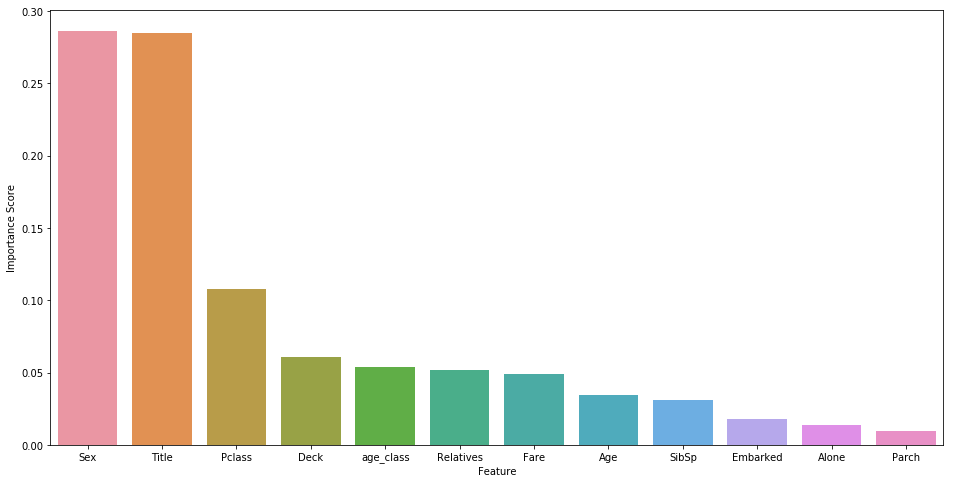

In [0]:
plt.figure(figsize = (16,8))
sns.barplot(x=feature_importance.index , y = 'Importance Score' ,data  = feature_importance)
plt.show()

- Title and Sex are the most important features in deciding the chances or survival
- not_alone and Parch doesn't play a significant role in our random forest classifiers prediction process.
- Infact we can drop them and simplify our model further if it doesn't impact our evaluation metric i.e accurcacy score a lot. Because of that I will drop them from the dataset and train the classifier again. 

See the code below to select features based on a certain threshold score from feature importance

In [0]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(random_forest_final, threshold=0.05 )

# Train the selector
sfm.fit(X_train, y_train)

# Printing the names of the important features
for feature_list_index in sfm.get_support(indices=True):
    print(X_train.columns[feature_list_index])

Pclass
Sex
Relatives
Deck
Title
age_class


#### Creating Data Subset With Only The Most Important Features

In [0]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

#### Let's Train A New Random Forest Classifier Using Only Most Important Features

In [0]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier( random_state = 42)
rf = RandomForestClassifier(random_state = 42)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#### Let's Compare The Accuracy Of Our Full Feature Classifier To Our Limited Feature Classifier

In [0]:
rf.score(X_train,y_train), rf_important.score(X_important_train,y_train)

(0.9225589225589226, 0.8787878787878788)

As can be seen by the accuracy scores, our original model which contained all the features is 92.2% accurate while the our ‘limited’ model which contained only half features is 87.8% accurate. 

Thus, for a small cost in accuracy we halved the number of features in the model and simplified it resulting in reduced training time and more generalizable result.

## Conclusion